### Importing Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error

### Import Data

In [4]:
california_housing_data = datasets.fetch_california_housing()

In [10]:
california_housing_df = pd.DataFrame(data=california_housing_data.data,columns=california_housing_data.feature_names)
california_housing_df['House Price'] = california_housing_data.target

### Initial Analysis

In [12]:
california_housing_df.shape

(20640, 9)

In [13]:
california_housing_df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
House Price    0
dtype: int64

In [14]:
california_housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [15]:
california_housing_df.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
House Price    float64
dtype: object

In [16]:
california_housing_df.describe(include='all')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Model Building

In [18]:
X = california_housing_df.iloc[:,:-1]
y= california_housing_df.iloc[:,-1]

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=24,test_size=0.20)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [20]:
linear_model = LinearRegression()
ridge_model = Ridge(alpha=0.1)
lasso_model = Lasso(alpha=0.1)
elastic_net_model = ElasticNet(alpha=0.1,l1_ratio=0.1)

### Model Training | Model Evaluation

In [21]:
linear_model.fit(X_train,y_train)
ridge_model.fit(X_train,y_train)
lasso_model.fit(X_train,y_train)
elastic_net_model.fit(X_train,y_train)

ElasticNet(alpha=0.1, l1_ratio=0.1)

In [25]:
model_params = pd.DataFrame()
model_params["Columns"] = X_train.columns
model_params["Coefficients"] = linear_model.coef_

In [26]:
model_params

,Columns,Coefficients
0,MedInc,0.428341
1,HouseAge,0.009833
2,AveRooms,-0.094534
3,AveBedrms,0.588149
4,Population,-0.000002
5,AveOccup,-0.003399
6,Latitude,-0.430069
7,Longitude,-0.442602


<Axes: xlabel='Coefficients', ylabel='Columns'>

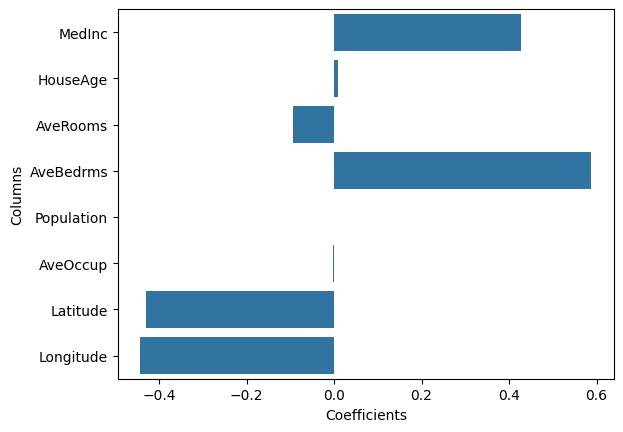

In [28]:
import seaborn as sns

sns.barplot(x="Coefficients",y="Columns",data = model_params)

<Axes: xlabel='Coefficients', ylabel='Columns'>

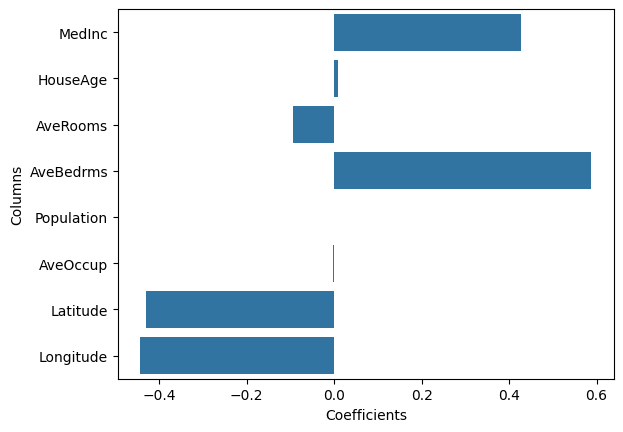

In [29]:
model_params_ridge = pd.DataFrame()
model_params_ridge["Columns"] = X_train.columns
model_params_ridge["Coefficients"] = ridge_model.coef_
sns.barplot(x="Coefficients",y="Columns",data = model_params_ridge)

In [30]:
model_params_ridge

,Columns,Coefficients
0,MedInc,0.428330
1,HouseAge,0.009834
2,AveRooms,-0.094513
3,AveBedrms,0.588037
4,Population,-0.000002
5,AveOccup,-0.003399
6,Latitude,-0.430066
7,Longitude,-0.442597


<Axes: xlabel='Coefficients', ylabel='Columns'>

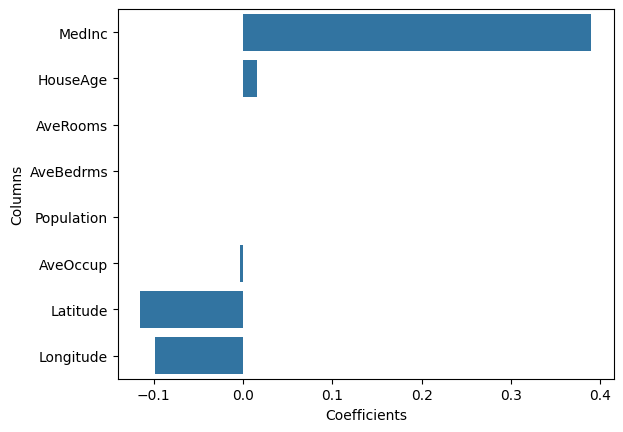

In [31]:
model_params_lasso = pd.DataFrame()
model_params_lasso["Columns"] = X_train.columns
model_params_lasso["Coefficients"] = lasso_model.coef_
sns.barplot(x="Coefficients",y="Columns",data = model_params_lasso)

In [32]:
model_params_lasso

,Columns,Coefficients
0,MedInc,0.389944
1,HouseAge,0.015624
2,AveRooms,-0.000000
3,AveBedrms,0.000000
4,Population,0.000021
5,AveOccup,-0.003126
6,Latitude,-0.114988
7,Longitude,-0.098796


      Columns  Coefficients
0      MedInc      0.381277
1    HouseAge      0.012415
2    AveRooms     -0.000000
3   AveBedrms      0.061180
4  Population      0.000008
5    AveOccup     -0.003401
6    Latitude     -0.324414
7   Longitude     -0.322905


<Axes: xlabel='Coefficients', ylabel='Columns'>

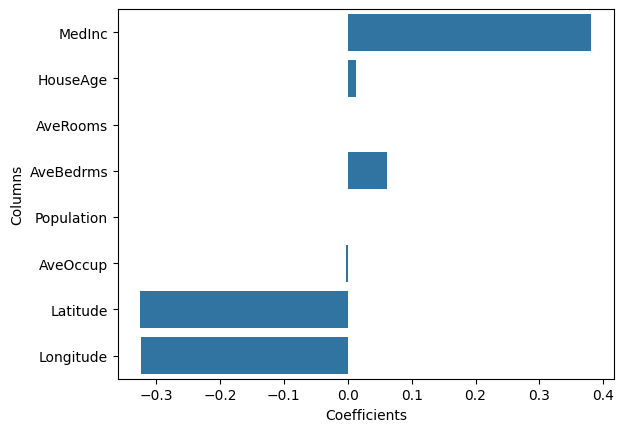

In [33]:
model_params_elasticnet = pd.DataFrame()
model_params_elasticnet["Columns"] = X_train.columns
model_params_elasticnet["Coefficients"] = elastic_net_model.coef_
print(model_params_elasticnet)
sns.barplot(x="Coefficients",y="Columns",data = model_params_elasticnet)

In [23]:
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_elasticnet = elastic_net_model.predict(X_test)

In [36]:
print("linear model MSE",mean_squared_error(y_pred_linear,y_test))
print("Ridge Model MSE", mean_squared_error(y_pred_ridge,y_test))
print("lasso model MSE", mean_squared_error(y_pred_lasso,y_test))
print("Elastic Net model MSE",mean_squared_error(y_pred_elasticnet,y_test))

linear model MSE 0.5084741695494901
Ridge Model MSE 0.5084760227836072
lasso model MSE 0.592104106346852
Elastic Net model MSE 0.5339674785353538
